In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


1. For the "Median value of owner-occupied homes" provide a boxplot

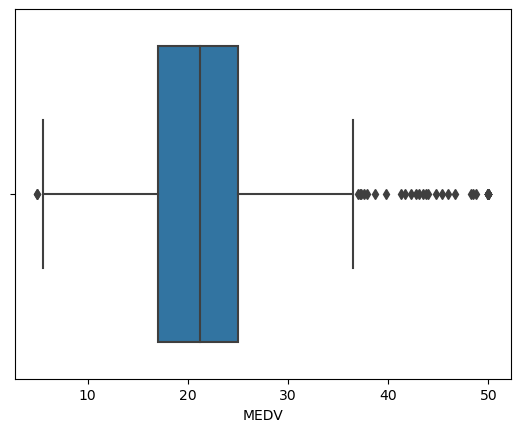

In [7]:
MEDV_boxplot = sns.boxplot(x='MEDV', data=boston_df)
plt.show()

2. Provide a  bar plot for the Charles river variable

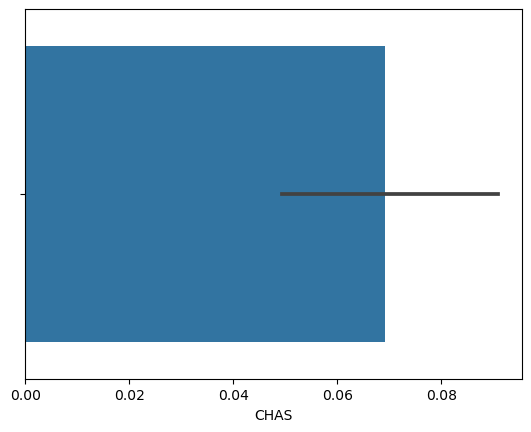

In [8]:
CHAS_barplot = sns.barplot(x='CHAS', data=boston_df)
plt.show()

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

In [10]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


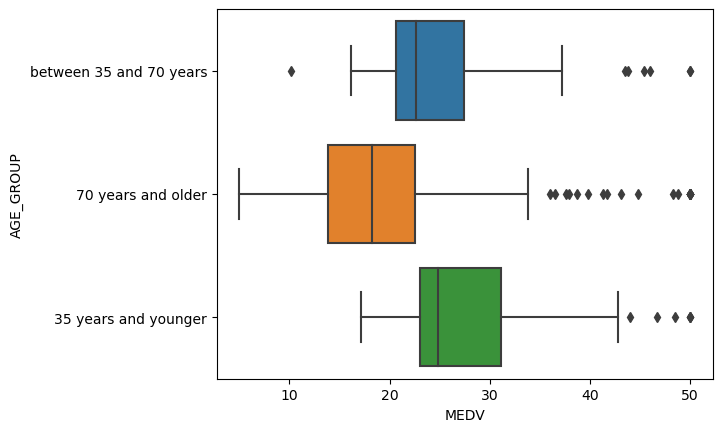

In [11]:
MEDV_AGE_GROUP_boxplot = sns.boxplot(x='MEDV', y='AGE_GROUP', data=boston_df)
plt.show()

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

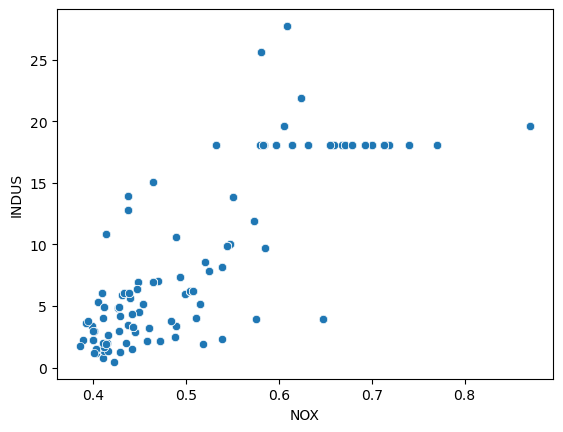

In [12]:
NOX_INDUS_scatterplot = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

There is a positive linear relation until some point. That is if NOX increases, INDUS increases too while NOX value was below 0.6 when the NOX value is higher we have a static INDUS value close to 20.

5. Create a histogram for the pupil to teacher ratio variable

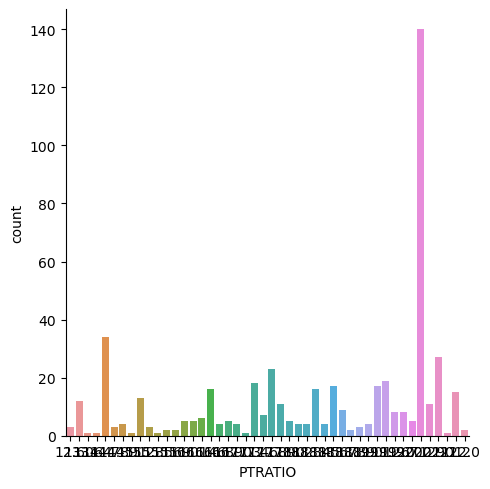

In [13]:
PTRATIO_histogram = sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.show()

6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Be sure to:
    1. State your hypothesis.
    2. Use α = 0.05
    3. Perform the test Statistics.
    4. State the conclusion from the test.

*   $H\_0: β1$ = 0 (Charles river has no effect on median value of houses)
*   $H\_1: β1$ is not equal to 0 (Charles river has an effect on median value of houses)

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [16]:
## X is the input variables (or independent variables)
X = boston_df['CHAS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.39e-05
Time:                        18:17:11   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value of houses based on Charles river. The coefficient 6.3462 means that Charles river get 6.3462 scores more than not Charles river.

7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Be sure to:
    1. State your hypothesis.
    2. Use α = 0.05
    3. Perform the test Statistics.
    4. State the conclusion from the test.


*   $H\_0: µ1 = µ2 = µ3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

### Regression with ANOVA option 1

In [18]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 83), 'AGE_GROUP'] = 'between 35 and 83 years'
boston_df.loc[(boston_df['AGE'] >= 83), 'AGE_GROUP'] = '83 years and older'

In [19]:
lm = ols('MEDV ~ AGE_GROUP', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq        F        PR(>F)
AGE_GROUP    2.0   5724.734481  2862.367241  38.9216  1.921024e-16
Residual   503.0  36991.560934    73.541871      NaN           NaN


### Regression with ANOVA option 2

In [20]:
X = pd.get_dummies(boston_df[['AGE_GROUP']])

In [21]:
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     38.92
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.92e-16
Time:                        18:39:07   Log-Likelihood:                -1803.8
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     503   BIC:                             3626.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                17.7430      0.308     57.527      0.000      17.137      18.349
AGE_GROUP_35 years and younger       10.0329      0.707     14.200      0.000       8.645      11.421
AGE_GROUP_83 years and older          1.3073      0.508      2.571      0.010       0.308       2.306
AGE_GROUP_between 35 and 83 years     6.4028      0.537     11.917      0.000       5.347       7.458
==============================================================================
Omnibus:                      167.287   Durbin-Watson:                   0.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.745
Skew:                           1.639   Prob(JB):                     1.32e-98
Kurtosis:                       6.260   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion: We can see the same values for ANOVA option 1 and option 2 and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Be sure to:
    1. State your hypothesis.
    2. Use α = 0.05
    3. Perform the test Statistics.
    4. State the conclusion from the test.

*   $H\_0: $No correlation
*   $H\_1: $Correlation

In [22]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           7.91e-98
Time:                        18:50:10   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Be sure to:
    1. State your hypothesis.
    2. Use α = 0.05
    3. Perform the test Statistics.
    4. State the conclusion from the test.

*   $H\_0: $No correlation
*   $H\_1: $Correlation

In [23]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        13:18:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between weighted distance and median value of owner occupied homes, it means that weighted distance doesn't have any kind of impact over median value of owner occupied homes